# Creating masks

## Context



To avoid contamination of bright sources in the derivation of light profiles, these regions need to be masked and therefore excluded. To do so, we use masks or sometimes referred to as "exclusion masks". These maps contain information in boolean values where the pixels to be exlcuded are stored as False/True, depending on the program requirements. In order for it to be exported to a FITS file, "boolean" values should to be converted to 1 or 0. Hence, the resulting array is of 1s and 0s saved as FITS with the orginal WCS (world coordinate system) and HEADER. 

### Objective: Build a Mask.fits from a DS9.reg file

Python alternative to making Mask in FITS (Flexible Image Transport System) format. Accepts DS9.reg files. 

### Requirements
<br>`Python 3.7` 
<br>`astropy`
<br>`numpy`
<br>`matplotlib` (only to display image)
<br>`pyregions` 
  
 <br>  To install `pyregions`: 
     
 <br>   **Using pip**
  <br>  pip install --no-deps pyregion
  
  <br>   **Using Conda**
  <br>  conda install -c conda-forge pyregion
              

In [16]:
import pyregion
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

### Load FITS image
Path-to-file

In [35]:
f = fits.open("C:\\Users\\anton\\Documents\\Hydra UDGs paper\\Hydra UDG GCs\\INPUT\\Cutout\\UDG24_g.fits")

### Create list of regions 
The regions file should be of a DS9.reg format or a file resembling its format which `pyregions` can then parse. 
<br>There are two ways of doing this:
<br>**1. Copy string below** which is then parsed and then converted to image coords which is required for the mask

In [36]:
region_string = """
# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5
circle(3:36:59.9074,-35:57:53.906,15.511")
circle(3:36:56.1276,-35:59:10.311,15.511")
circle(3:36:54.4965,-35:58:21.617,15.511")
circle(3:36:46.9230,-35:57:29.641,15.511")
circle(3:36:42.3698,-35:58:40.667,15.511")
circle(3:36:38.5472,-35:58:58.096,15.511")
circle(3:36:36.6992,-35:57:24.422,15.511")
circle(3:36:54.7948,-36:02:28.226,15.511")
circle(3:36:57.1146,-36:02:53.579,15.511")
circle(3:36:36.5146,-36:02:40.885,15.511")
"""
r1 = pyregion.parse(region_string).as_imagecoord(f[0].header)

<br>**2. Import regions file** 
<br> The coordinates are then converted to image coords which is required for the mask
<br> Sometimes a warning is issued but this can be ignored: WARNING: FITSFixedWarning: RADECSYS= 'ICRS ' / Astrometric system 
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs] 

In [37]:
region_name = "C:\\Users\\anton\\Documents\\Hydra UDGs paper\\Hydra UDG GCs\\INPUT\\Mask\\UDG24_mask.reg"
r = pyregion.open(region_name).as_imagecoord(f[0].header)

### Create mask
The mask is obtained using `pyregion.get_mask` which accepts three arguments (region, hdu, origin=1); region is the shape and hdu is the header of the original image. It then returns a mask, which is an array of boolean values. 
<br> Since the mask returned is of boolean values, the values in this array should be converted to integers (0,1). We do this by multiplying the array. 

In [38]:
mask = r.get_mask(hdu=f[0])
mask_val = np.multiply(mask, 1)

### View mask array 
`plt.imshow` can be used to project the array into a 2D image

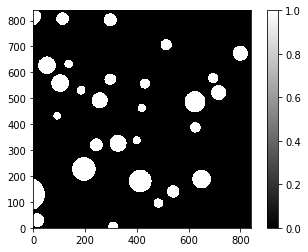

In [39]:
plt.imshow(mask_val, origin="lower", interpolation="nearest", cmap='gray', vmin=0, vmax=1)
plt.colorbar()

### Export to FITS
The mask array is then exported to a FITS file along with the header of the original image. 

In [40]:
mask_fits = 'C:\\Users\\anton\\Documents\\Hydra UDGs paper\\Hydra UDG GCs\\INPUT\\Mask\\UDG24_g_mask_v2.fits'
hdu = fits.PrimaryHDU(mask_val, header=f[0].header)
hdu.writeto(mask_fits, overwrite=True)